# 🧬 Microbes Predictor

In this notebook, we will transition from health experts to microbioligists to save lives. The reality of life is that sadly, it takes more than 24 h to grow up the bacteria recovered from the blood of an infected patient, identify the species, and then determine to which antibiotics the organism is resistant, leading to a very high mortality rate for such infections. 

Our goal in this notebook is to instantly identify the microbe using machine learning given extracted features about them. Our classes include the following ten microbes  (`Spirogyra`, `Volvox`, `Pithophora`, `Yeast`, `Raizopus`, `Penicillum`, `Aspergillus sp`, `Protozoa`, `Diatom`, `Ulothrix`).

Our dataset have over 24K observations to help us learn to classify the microbes based on some meaningful features that you can read more about [here](https://www.kaggle.com/datasets/sayansh001/microbes-dataset).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

#### Data Ingestion

TODO 1: Download the dataset from [Kaggle](https://www.kaggle.com/datasets/sayansh001/microbes-dataset) and rename it into `microbes.csv` and manually put `Serial` as the name of the first column.

In [2]:
dataset = pd.read_csv('microbes.csv')

dataset.head(10)

,Serial,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,...,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi,microorganisms
0,0,10.70,15.8,5.43,3.75,0.785,8.14,2.1500,22.3,2.97,...,2.97,1.340,1.610,0.683,0.1950,3.63,12.10,1.310,7.99,Spirogyra
1,1,5.60,18.3,4.14,6.16,0.364,3.51,18.6000,22.5,5.41,...,5.47,1.520,1.520,1.010,0.2150,6.01,20.60,0.765,7.99,Spirogyra
2,2,8.32,19.8,4.63,6.66,0.415,5.85,21.0000,22.4,5.96,...,5.96,1.630,1.380,1.110,0.1820,6.55,11.50,0.953,7.99,Spirogyra
3,3,10.10,17.9,7.29,11.10,1.470,6.30,9.9400,21.9,8.81,...,8.88,2.040,2.120,0.715,0.3710,10.30,12.00,2.340,7.99,Spirogyra
4,4,6.27,20.2,20.10,10.70,14.700,3.97,2.5800,11.9,10.20,...,10.20,7.780,6.210,6.800,4.4400,14.00,9.55,17.600,7.99,Spirogyra
5,5,9.47,18.4,4.27,14.60,0.400,7.29,20.1000,22.5,13.60,...,13.60,1.080,1.070,0.963,0.1360,14.10,15.50,0.812,7.99,Spirogyra
6,6,13.50,19.8,4.50,17.30,0.493,9.67,0.0334,22.2,16.80,...,16.90,1.170,0.981,0.381,0.1070,17.20,7.88,0.903,7.99,Spirogyra
7,7,15.60,19.6,4.16,19.60,0.352,12.10,0.6270,22.3,19.30,...,19.30,0.979,0.845,0.328,0.0789,19.50,12.30,0.771,7.99,Spirogyra
8,8,8.95,20.0,8.59,3.28,1.520,5.50,9.0800,21.1,1.20,...,1.22,2.770,2.260,3.420,0.5760,3.32,11.60,3.240,9.69,Spirogyra
9,9,11.20,17.4,3.53,4.33,0.332,8.37,14.7000,22.6,3.60,...,3.60,0.896,0.966,0.347,0.0801,4.13,9.27,0.560,9.69,Spirogyra


#### Data Cleaning

In [3]:
num_missing_vals = dataset.isnull().sum().sum()
print(f"Number of missing values: {num_missing_vals}")

Number of missing values: 0


#### Split the Dataset

In [4]:
# column split
x_data = dataset.drop(columns=['Serial', 'microorganisms'])     # Serial is ID and microorganisms is target
x_data = x_data.iloc[:, :10]                                    # First ten features contain enough information
y_data = dataset['microorganisms']                              # Target variable

# train-test split
x_data, y_data = x_data.to_numpy(), y_data.to_numpy()
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, random_state=0, stratify=y_data)

#### Exploratory Analysis

<BarContainer object of 10 artists>

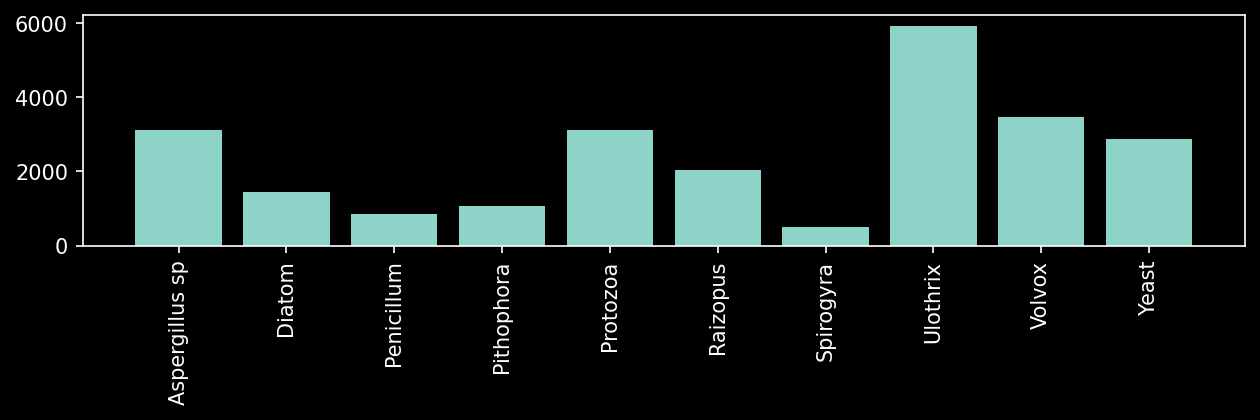

In [5]:
plt.style.use('dark_background')
plt.figure(figsize=(10, 2), dpi=150)
plt.xticks(rotation=90)
labels, counts = np.unique(y_train, return_counts=True)
plt.bar(labels, counts, align='center')

## 😎 Put on Your Machine Learning Engineer Goggles

In [6]:
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

from BayesClassifier import BayesClassifier
from KDEstimator import KDEstimator

### Gaussian Naive Bayes

In [7]:
# Initiate
gnb_model = BayesClassifier(mode='GNB')
# Fit
gnb_model.fit(x_train, y_train)
# Predict
gnb_y_pred = gnb_model.predict(x_val)
# Evalute
gnb_accuracy = gnb_model.score(x_val, y_val)
print("Gaussian Naive Bayes Accuracy:", gnb_accuracy)

Gaussian Naive Bayes Accuracy: 0.2601


<img src="https://media1.tenor.com/m/P1kvseQ5INIAAAAd/blank-stare-really.gif" width="200"/>

#### Linear Discriminant Analysis

In [8]:
# Initiate
lda_model = BayesClassifier(mode='LDA')
# Fit
lda_model.fit(x_train, y_train)
# Predict
lda_y_pred = lda_model.predict(x_val)
# Evaluate
lda_accuracy = lda_model.score(x_val, y_val)
print("Linear Discriminant Analysis Accuracy:", lda_accuracy)

Linear Discriminant Analysis Accuracy: 0.3744


<img src="https://media1.tenor.com/m/lL6lmpGAtSwAAAAd/cat-kid-retekmacska.gif" width=200/>

#### Quadratic Discriminant Analysis

In [9]:
qda_model = BayesClassifier(mode='QDA')
qda_model.fit(x_train, y_train)
qda_y_pred = qda_model.predict(x_val)
qda_accuracy = qda_model.score(x_val, y_val)
print("Quadratic Discriminant Analysis Accuracy:", qda_accuracy)

Quadratic Discriminant Analysis Accuracy: 0.3413


<img src="https://media1.tenor.com/m/AFKVFcP5to8AAAAd/julesmaru-really.gif" width="250"/>

#### Kernel Density Estimation

In [10]:
# kde = KDEstimator(bump='Gauss', bandwidth='Scott')
# kde_clf = BayesClassifier(mode='KDE', kde_config=kde)
# kde_clf.fit(x_train, y_train)


# TODO 2: Call KDEstimator with Gauss bump and bandwidth=0.5
kde_config = KDEstimator(bump='Gauss', bandwidth=0.455)

# TODO 3: Call BayesClassifier in KDE mode and pass it that instance
kde_model = BayesClassifier(mode='KDE', kde_config=kde_config)

kde_model.fit(x_train, y_train)
kde_y_pred = kde_model.predict(x_val)
kde_accuracy = kde_model.score(x_val, y_val)
print("Bayes Classifier with KDE Accuracy:", kde_accuracy)

Bayes Classifier with KDE Accuracy: 0.9785


<img src="https://media1.tenor.com/m/QxqYH15_UxYAAAAd/wow-omg.gif" width="250">

#### 1. Explain why all three of GNB, LDA, QDA performed much worse than KDE:

In [11]:
'''
    They all assume that the data is normally distributed, which is not the case for the given dataset (shown from the histogram).
'''

'\n    They all assume that the data is normally distributed, which is not the case for the given dataset (shown from the histogram).\n'

#### 2. Why is Bayes Classifier with KDE much slower than Bayes Classifier with normality assumption. Explain in light of the inference complexity for both (even if roughly):

In [12]:
'''
    - Bayes Classifier with Normality Assumption:
      Evaluate the Gaussian probability density function (one computation).

    - Bayes Classifier with KDE:
      Evaluate the kernel function at the location of the instance for each data point in the training set (m computations).

'''

'\n    - Bayes Classifier with Normality Assumption:\n      Evaluate the Gaussian probability density function (one computation).\n\n    - Bayes Classifier with KDE:\n      Evaluate the kernel function at the location of the instance for each data point in the training set (m computations).\n\n'

#### 3. Deduce why the performance does not get better when Silverman bandwidth is used

In [13]:
'''
Answer goes here. 
This may help https://en.wikipedia.org/wiki/Kernel_density_estimation#A_rule-of-thumb_bandwidth_estimator

"it can yield widely inaccurate estimates when the density is not close to being normal."
'''

'\nAnswer goes here. \nThis may help https://en.wikipedia.org/wiki/Kernel_density_estimation#A_rule-of-thumb_bandwidth_estimator\n\n"it can yield widely inaccurate estimates when the density is not close to being normal."\n'

#### [Extra] Try to exceed the current KDE accuracy by trying different hyperparameters (bandwidth or bump)